# Customer Purchase Behavior Analysis and Future Purchase Anticipation
Timur Gajiyev 

Project Overview:

This project aims to analyze and derive insights from a comprehensive customer dataset, exploring various facets of purchase behavior and demographics. The analysis covers customer demographics, item preferences, geographic trends, seasonal variations, and payment behaviors. Additionally, the project includes the development of a predictive model to anticipate future purchases by new customers within the following year from their initial purchase.

**1. Problem Definition** 
   * Objective: Identify and classify customer segments based on their transactional behavior.
   
   * Dataset: Use a publicly available e-commerce or retail dataset with customer transactions.

**2. Data Exploration and Descriptive Statistics**

   - 2.1 Load and explore the dataset to understand its structure.
   - 2.2 Check for missing values, outliers, and understand the distribution of features.
   - 2.3 Analyze age and gender distributions.
   - 2.4 Identify popular items and product categories.
   - 2.5 Explore purchase amounts and review ratings.
    

## 1. Problem Definition

## 2. Data Exploration and Descriptive Statistics

**Customer ID** - Unique identifier for each customer <br>
**Age** - Age of the customer <br>
**Gender** - Gender of the customer (Male/Female) <br>
**Item Purchased** - The item purchased by the customer <br>
**Category** - Category of the item purchased <br>
**Purchase Amount (USD)** - The amount of the purchase in USD <br>
**Location** - Location where the purchase was made <br>
**Size** - Size of the purchased item <br>
**Color** - Color of the purchased item <br>
**Season** - Season during which the purchase was made <br>
**Review Rating** - Rating given by the customer for the purchased item <br>
**Subscription Status** - Indicates if the customer has a subscription (Yes/No) <br>
**Shipping Type** - Type of shipping chosen by the customer <br>
**Discount Applied** - Indicates if a discount was applied to the purchase (Yes/No) <br>
**Promo Code Used** - Indicates if a promo code was used for the purchase (Yes/No) <br>
**Previous Purchases** - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction <br>
**Payment Method** - Customer's most preferred payment method <br>
**Frequency of Purchases** - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)


### 2.1

Preparing of all neccessary modules


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools

Load the data

In [3]:
#Read the data file
df = pd.read_csv("shopping_trends.csv", encoding="ISO-8859-1", dtype={"Customer ID":str})
print("Dataframe dimensions", df.shape)
display(df[0:5])

Dataframe dimensions (3900, 19)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


### 2.2

In [14]:
# Append the new rows of null values to the DataFrame
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:"column type"})
tab_info = tab_info._append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))

# No null values detected, but for later better to delete them
df = df.dropna(axis=0)

display(tab_info)
#print(tab_info.__dict__)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
column type,object,int64,object,bool,object,int64,object,object,object,object,float64,object,object,object,object,object,int64,object,object
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


{'_is_copy': None, '_mgr': BlockManager
Items: Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')
Axis 1: Index(['column type', 'null values (nb)'], dtype='object')
NumpyBlock: slice(0, 19, 1), 19 x 2, dtype: object, '_item_cache': {}, '_attrs': {}, '_flags': <Flags(allows_duplicate_labels=True)>}


### 2.3

         count       mean        std   min   25%   50%   75%   max
Gender                                                            
Female  1248.0  44.007212  14.953843  18.0  31.0  44.0  57.0  70.0
Male    2652.0  44.097285  15.328257  18.0  31.0  44.0  57.0  70.0


<Axes: xlabel='Age', ylabel='Count'>

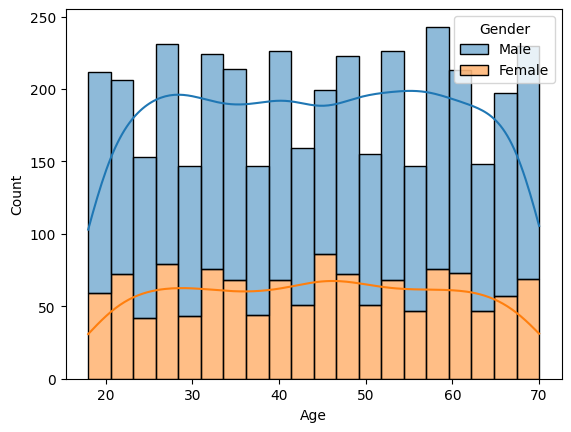

In [5]:
df["Purchase Amount (USD)"].describe()
#df.groupby(by=grouping_column)[aggregation_column].agg(aggregation_function)
#age_gender = df.groupby('Gender')['Age'].agg(['mean', 'median', 'min', 'max'])
age_gender_distribution = df.groupby('Gender')['Age'].describe()
print(age_gender_distribution)
sns.histplot(data = df, x='Age', hue='Gender', multiple='stack', bins=20, kde=True)

### 2.4

In [13]:
popular_items = df['Item Purchased'].value_counts().head(10)
print("Top 10 popular items")
print(popular_items)

popular_categories = df['Category'].value_counts().head(10)
print("\nTop 10 popular categories")
print(popular_categories)

Top 10 popular items
Item Purchased
True    3900
Name: count, dtype: int64

Top 10 popular categories
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
